In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#this is a python magic function to automatically show matplotlib plots
%matplotlib inline

In [16]:
half_races = pd.read_csv('../data/half_races.csv')
half_races.head(2)

,Unnamed: 0,Race,Runners,Fastest Time,Slowest Time,Time Difference,Did Not Finish
0,0,2016,22429,2020-11-22 01:11:15,2020-11-22 04:54:41,0 days 03:43:26.000000000,4512
1,1,2017,22292,2020-11-22 01:10:58,2020-11-22 06:18:24,0 days 05:07:26.000000000,4593


In [17]:
half_races['Fastest Time'] = pd.to_datetime(half_races['Fastest Time'])
half_races['Slowest Time'] = pd.to_datetime(half_races['Slowest Time'])
#half_races['Time Difference'] = pd.to_datetime(half_races['Time Difference'])
#half_races
half_races['Fastest Time'] = half_races['Fastest Time'].dt.strftime('%H:%M:%S')
half_races['Slowest Time'] = half_races['Slowest Time'].dt.strftime('%H:%M:%S')
#half_races['Time Difference'] = pd.to_datetime(half_races['Time Difference'])
half_races

,Unnamed: 0,Race,Runners,Fastest Time,Slowest Time,Time Difference,Did Not Finish
0,0,2016,22429,01:11:15,04:54:41,0 days 03:43:26.000000000,4512
1,1,2017,22292,01:10:58,06:18:24,0 days 05:07:26.000000000,4593
2,2,2018,14940,01:09:25,06:26:37,0 days 05:17:12.000000000,0
3,3,2019,17236,01:10:03,05:52:56,0 days 04:42:53.000000000,3530


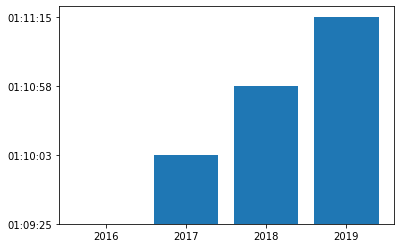

In [18]:
plt.bar(half_races['Race'], half_races['Fastest Time'].sort_values())
plt.xticks(half_races['Race'])
plt.yticks(half_races['Fastest Time'])
plt.title('');

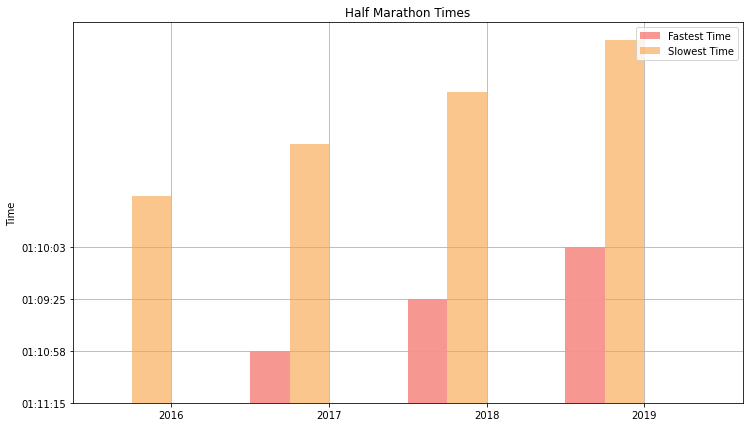

In [19]:
# Setting the positions and width for the bars
pos = list(range(len(half_races['Fastest Time']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(12,7))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        half_races['Fastest Time'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=half_races['Fastest Time'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        half_races['Slowest Time'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=half_races['Slowest Time'][1]) 

# Set the y axis label
ax.set_ylabel('Time')

# Set the chart's title
ax.set_title('Half Marathon Times')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_yticks(half_races['Fastest Time'].sort_values())

# Set the labels for the x ticks
ax.set_xticklabels(half_races['Race'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(full_races['Fastest Time'])] + full_races['Slowest Time'])

# Adding the legend and showing the plot
plt.legend(['Fastest Time', 'Slowest Time'], loc='upper right')
plt.grid()
plt.show()